Populating the interactive namespace from numpy and matplotlib
5641
5532


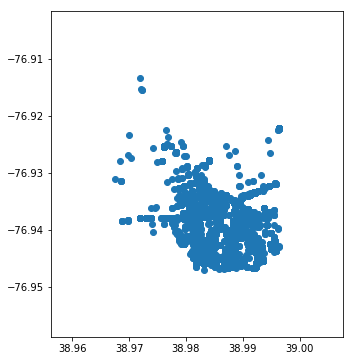

In [1]:
%pylab inline

from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn import datasets
from matplotlib.patches import Ellipse

df = pd.read_csv("crime-night.csv")
#scatter(df.latitude, df.longitude);
clong = df.longitude
clati = df.latitude
centerLati = 38.98191763
centerLong = -76.929194
milePerLati = 0.01449
milePerLong = 0.01818
outliers = []
clongList = []
clatiList = []
for i in range(0, len(df.latitude)):
    if ((clati[i] >= centerLati + milePerLati) or (clati[i] <= centerLati - milePerLati) or (clong[i] >= centerLong + milePerLong) or (clong[i] <= centerLong - milePerLong)):
        outliers.append(i)

for i in range(0, len(df.latitude)):
    if i not in outliers:
        clatiList.append(clati[i])
        clongList.append(clong[i])

#scatter(clati, clong)
#print(outliers)
print(len(df.latitude))
print(len(clatiList))
figure(figsize=(6,6)); ax=subplot(aspect='equal')
scatter(clatiList, clongList)

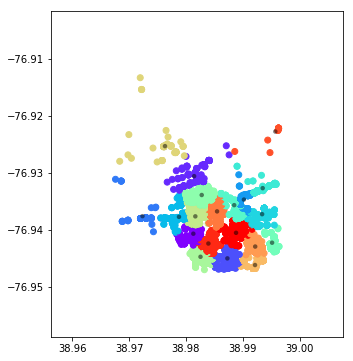

In [2]:
#K-NN Model
lati = np.array(clatiList)
long = np.array(clongList)


data = np.column_stack((lati,long))
kmeans = KMeans(init='random', n_clusters=20, n_init=100)
kmeans.fit(data)

figure(figsize=(6,6)); ax=subplot(aspect='equal')
scatter(lati,long,c=kmeans.labels_,cmap=cm.rainbow);

C = kmeans.cluster_centers_
scatter(C[:,0],C[:,1],c='k',marker='o',s=20,alpha=0.5,edgecolor='none');

[ 38.97561397 -76.93763565]
[ 38.99115861 -76.94300689]
[ 38.98907665 -76.93583628]
[ 38.98361305 -76.94414896]
[ 38.98191998 -76.9376301 ]
[ 38.9822973  -76.93252265]
[ 38.98211219 -76.94064758]
[ 38.98930277 -76.9438185 ]
[ 38.99301223 -76.93280617]
[ 38.97653675 -76.92573181]
[0.0065675857996768854, 0.0053590178550949521, 0.0047617046012225208, 0.0039938147997225755, 0.0047806436938718066, 0.0050534329162160423, 0.0047952165266886646, 0.0050987705692028366, 0.0075261743889366893, 0.0061148418829756008]


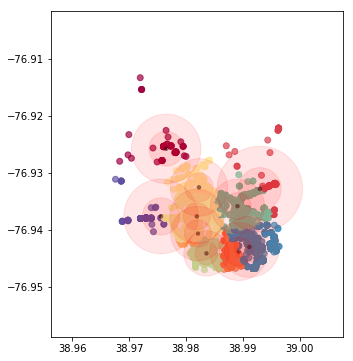

In [16]:
#Gaussian Mixtures
figure(figsize=(6,6)); ax=subplot(aspect='equal')
compoCount = 10
gmm = GaussianMixture(n_components=compoCount, covariance_type='spherical')
gmm.fit(data)
radi = []
for n in arange(0, compoCount): 
    if gmm.covariance_type == 'spherical': cov = eye(data.shape[1])*gmm.covariances_[n]
    elif gmm.covariance_type == 'full': cov = gmm.covariances_[n][:2, :2]
    elif gmm.covariance_type == 'tied': cov = gmm.covariances_[:2, :2]
    elif gmm.covariance_type == 'diag': cov = diag(gmm.covariances_[n][:2])
    v, w = np.linalg.eigh(cov)
    angle = 180/pi * arctan2(w[0,1],w[0,0])
    print(gmm.means_[n,:2])
    for i in range(1,3):
        a = 2*i*np.sqrt(v) 
        ell = Ellipse(gmm.means_[n,:2], a[0],a[1], angle)
        ell.set_alpha(0.1)
        ell.set_color('red')
        ax.add_artist(ell)
        if (i == 1):
            radi.append(a[0])

C = gmm.means_
plt.scatter(lati, long, c=gmm.predict(data), alpha=0.7, cmap=cm.Spectral_r)
scatter(C[:,0],C[:,1],c='k',marker='o',s=20,alpha=0.5,edgecolor='none');
print(radi)

In [7]:
from collections import Counter
c=gmm.predict(data)
counter = Counter(c)
counter

Counter({0: 671,
         1: 1837,
         2: 994,
         3: 766,
         4: 305,
         5: 83,
         6: 81,
         7: 182,
         8: 22,
         9: 591})

In [22]:
#Prepare data
import json
CrimeCluster = []
for i in range(0, compoCount):
    CrimeCluster.append({"latitude": C[i][0], "longitude": C[i][1], "radius": radi[i] * 50, "count": counter[i], "time": "day"})

json.dump(CrimeCluster, open("crimeSampleDay.json", "w"))